<a href="https://colab.research.google.com/github/patwalbhumika/IPLSentimentAnalysis/blob/main/IPL_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Labelled_Dataset.csv'
# Load dataset into pandas DataFrame
data = pd.read_csv(file_path)

#to display size
print("size and columns of training_dataset- ",data.shape)

#to display count of different values
value_counts = data['Sentiment'].value_counts()
print(value_counts)


size and columns of training_dataset-  (1690, 2)
Sentiment
Positive    1246
Neutral      292
Negative     152
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
print("DONE")

DONE


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['english_text'], data['Sentiment'], test_size=0.2, random_state=42)

#converts them into 1Darray
y_train=y_train.values
y_test=y_test.values


#BAG OF WORDS

In [ ]:
# Initialising CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
x_train_bow = vectorizer.fit_transform(x_train)

# Transform the testing data
x_test_bow = vectorizer.transform(x_test)

print("This is what Bag Of Words(BOW) Representation looks like-")
print(x_train_bow[:10].toarray())
print("\n**Bag Of Words SUCCESSFUL**")

This is what Bag Of Words(BOW) Representation looks like-
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

**Bag Of Words SUCCESSFUL**


**Now X_train_bow and X_test_bow contain the bag-of-words representations of the training and testing data respectively**

#TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer_tfidf = TfidfVectorizer()

# Fit and transform the training data
x_train_tfidf = vectorizer_tfidf.fit_transform(x_train)

# Transform the testing data
x_test_tfidf = vectorizer_tfidf.transform(x_test)

print("This is what TF-IDF representation looks like-")
print(x_train_tfidf[:10].toarray())
print("\n**TF-IDF Suuccessful!**")

This is what TF-IDF representation looks like-
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

**TF-IDF Suuccessful!**


#wordToVec

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

tokenized_train = [word_tokenize(text.lower()) for text in x_train]
tokenized_test = [word_tokenize(text.lower()) for text in x_test]

# Training Word2Vec model
model_w2v = Word2Vec(sentences=tokenized_train, vector_size=100, window=5, min_count=1, workers=4)

# Function to create average word vectors
def feature_vectorizer(tokens, model):
    words = [word for word in tokens if word in model.wv]
    if words:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.zeros(100)

# Transforming text into average vectors
x_train_w2v = np.array([feature_vectorizer(text, model_w2v) for text in tokenized_train])
x_test_w2v = np.array([feature_vectorizer(text, model_w2v) for text in tokenized_test])

print("\nThis is what Word To Vector(w2v) Representation looks like-")
print(x_train_w2v[:2])
print("\n**Word2Vec SUCCESSFULLY GENERATED!**")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



This is what Word To Vector(w2v) Representation looks like-
[[-7.29566932e-01  5.29964209e-01  3.73932362e-01  7.36098766e-01
   3.48778695e-01 -6.01149946e-02  9.02263224e-01  4.24850851e-01
  -6.24795496e-01 -8.70468676e-01  3.73567671e-01 -5.63588917e-01
  -3.16635340e-01  1.34410053e-01  4.42639768e-01  3.72389942e-01
   1.00604165e+00  8.89092028e-01 -1.09205437e+00 -7.04536140e-01
   7.04093516e-01  1.17642149e-01  1.35156476e+00 -7.25480556e-01
   2.33673722e-01  3.00725162e-01 -2.56425202e-01  4.79370475e-01
  -2.64047682e-01  5.85987091e-01  1.78601816e-01 -9.61132884e-01
  -2.47232601e-01 -9.02760863e-01 -1.68187067e-01  1.38247088e-01
   7.25388825e-01  6.71470344e-01  2.71893829e-01  6.34103298e-01
   2.20857129e-01 -1.99244842e-01 -5.34157693e-01 -1.92253031e-02
   3.48890185e-01  6.10408604e-01 -4.69935872e-02  1.80695638e-01
   3.16364169e-01  5.37097931e-01  2.82281488e-02 -3.68341535e-01
  -2.63381183e-01 -5.63559592e-01 -3.63546520e-01  1.53292909e-01
   3.90428275e-

#using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialization
rfc_bow = RandomForestClassifier()
rfc_tfidf = RandomForestClassifier()
rfc_w2v = RandomForestClassifier()

# Training the classifiers on different feature sets
rfc_bow.fit(x_train_bow, y_train)
rfc_tfidf.fit(x_train_tfidf, y_train)
rfc_w2v.fit(x_train_w2v, y_train)

# Predicting sentiment labels for the testing data
y_predict1 = rfc_bow.predict(x_test_bow)
y_predict2 = rfc_tfidf.predict(x_test_tfidf)
y_predict3 = rfc_w2v.predict(x_test_w2v)

# Calculating the accuracy of model
accuracy_rfc_BOW = accuracy_score(y_test, y_predict1)
print("Random Forest Accuracy (BAG OF WORDS):", accuracy_rfc_BOW)

accuracy_rfc_tfidf = accuracy_score(y_test, y_predict2)
print("Random Forest Accuracy(TF-IDF):", accuracy_rfc_tfidf)

accuracy_rfc_w2v = accuracy_score(y_test, y_predict3)
print("Random Forest Accuracy:(W2V)", accuracy_rfc_w2v)


Random Forest Accuracy (BAG OF WORDS): 0.7337278106508875
Random Forest Accuracy(TF-IDF): 0.7485207100591716
Random Forest Accuracy:(W2V) 0.6804733727810651


#Now lets do it using Naive_Bayes classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score

# Initialization
#multinomial -> design for count-based  feature vectors(non-negative integers),
# word2vec contains continuous values(real numbers), so GaussianNB is more suitable
nb_classifier_bow = MultinomialNB()
nb_classifier_ifidf = MultinomialNB()
nb_classifier_w2v = GaussianNB()

# Train the classifier on training data BOW representation
nb_classifier_bow.fit(x_train_bow, y_train)
nb_classifier_ifidf.fit(x_train_tfidf, y_train)
nb_classifier_w2v.fit(x_train_w2v, y_train)

# Predicting sentiment labels for the testing data
y_pred_nb1 = nb_classifier_bow.predict(x_test_bow)
y_pred_nb2 = nb_classifier_ifidf.predict(x_test_tfidf)
y_pred_nb3 = nb_classifier_w2v.predict(x_test_w2v)

# Calculating the Naive bayes accuracy for different methods
accuracy_nb_BOW = accuracy_score(y_test, y_pred_nb1)
print("Naive Bayes Accuracy (BAG OF WORDS):", accuracy_nb_BOW)

accuracy_nb_tfidf = accuracy_score(y_test, y_pred_nb2)
print("Naive Bayes Accuracy(TF-IDF):", accuracy_nb_tfidf)

accuracy_nb_w2v = accuracy_score(y_test, y_pred_nb3)
print("Naive Bayes Accuracy (W2V): ", accuracy_nb_w2v)


Naive Bayes Accuracy (BAG OF WORDS): 0.7603550295857988
Naive Bayes Accuracy(TF-IDF): 0.727810650887574
Naive Bayes Accuracy (W2V):  0.5473372781065089


#using SVM(Support Vector Machine) Algorithm

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM Classifier
svm_classifier = SVC()

# Function to train and evaluate classifier
def train_and_evaluate(clf, x_train, y_train, x_test, y_test):
    # Convert sparse matrix to dense if necessary
    if hasattr(x_train, "toarray"):
        x_train = x_train.toarray()
    if hasattr(x_test, "toarray"):
        x_test = x_test.toarray()

    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Applying SVM classifier separately to each method
methods = ['Bag of Words', 'TF-IDF', 'Word2Vec']
representations = [(x_train_bow, x_test_bow), (x_train_tfidf, x_test_tfidf), (x_train_w2v, x_test_w2v)]

# Store accuracies in separate variables
accuracy_svm_BOW = train_and_evaluate(svm_classifier, representations[0][0], y_train, representations[0][1], y_test)
print(f"SVM Accuracy (Bag of Words): {accuracy_svm_BOW}")

accuracy_svm_tfidf = train_and_evaluate(svm_classifier, representations[1][0], y_train, representations[1][1], y_test)
print(f"SVM Accuracy (TF-IDF): {accuracy_svm_tfidf}")

accuracy_svm_w2v = train_and_evaluate(svm_classifier, representations[2][0], y_train, representations[2][1], y_test)
print(f"SVM Accuracy (Word2Vec): {accuracy_svm_w2v}")


SVM Accuracy (Bag of Words): 0.7071005917159763
SVM Accuracy (TF-IDF): 0.7514792899408284
SVM Accuracy (Word2Vec): 0.7041420118343196


#Now,lets plot a table for comparing all different methods and classifiers

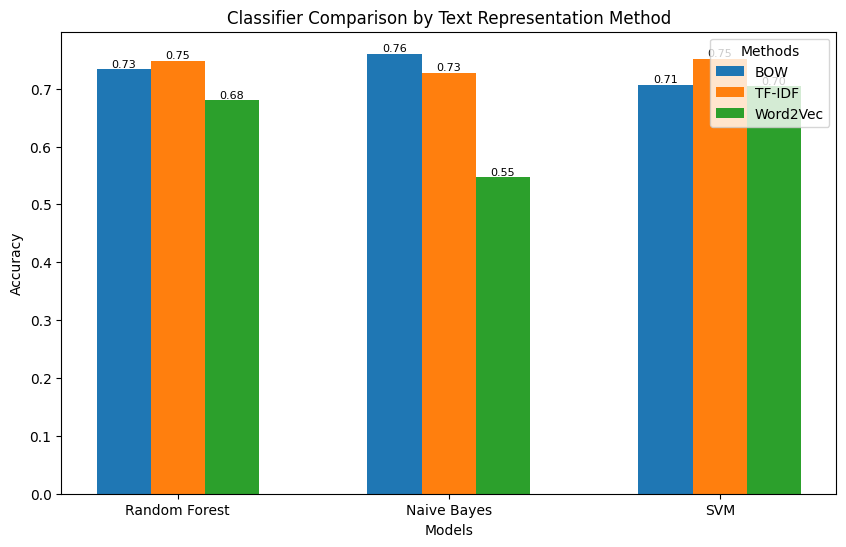

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the accuracy values
BOW_accuracies = [accuracy_rfc_BOW, accuracy_nb_BOW, accuracy_svm_BOW]
tfidf_accuracies = [accuracy_rfc_tfidf, accuracy_nb_tfidf, accuracy_svm_tfidf]
w2v_accuracies = [accuracy_rfc_w2v, accuracy_nb_w2v, accuracy_svm_w2v]

# Define the classifiers and methods
models = ['Random Forest', 'Naive Bayes', 'SVM']
methods = ['BOW', 'TF-IDF', 'Word2Vec']

# Create data for plotting
data = np.array([BOW_accuracies, tfidf_accuracies, w2v_accuracies])

# Set the width of the bars
bar_width = 0.2

# Set the x locations for the groups
index = np.arange(len(models))

# Plot the bar charts
plt.figure(figsize=(10, 6))

for i, method in enumerate(methods):
    bars = plt.bar(index + i * bar_width, data[i], bar_width, label=method)
    # Add text annotations
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

# Add labels and titles
plt.title('Classifier Comparison by Text Representation Method')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(index + bar_width, models)
plt.legend(title='Methods')

plt.show()
